In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline 

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('df_hdi_complete.csv')

In [3]:
df_country = pd.read_excel('dados_hdi.xlsx')
df_country = df_country[['Country']]

In [4]:
df = df.drop(['RHDI','Continent'], axis=1)
min_max_scaler = MinMaxScaler()
df[['HDI', 'LE', 'EYS', 'MYS', 'GNI', 'GDIV', 'GIIV', 'IHDI', 'ILE', 'IE',
       'II', 'SSP', 'TP', 'TUP', 'MA', 'CHE', 'GEE', 'PPP', 'HB', 'VE', 'RPAE',
       'WAFI', 'CDEP', 'CDE', 'FA', 'FAC', 'DMC', 'RLI', 'SLF', 'RDE']] = min_max_scaler.fit_transform(df[['HDI', 'LE', 'EYS', 'MYS', 'GNI', 'GDIV', 'GIIV', 'IHDI', 'ILE', 'IE',
       'II', 'SSP', 'TP', 'TUP', 'MA', 'CHE', 'GEE', 'PPP', 'HB', 'VE', 'RPAE',
       'WAFI', 'CDEP', 'CDE', 'FA', 'FAC', 'DMC', 'RLI', 'SLF', 'RDE']])

In [5]:
###############
### Economy ###
###############

### Defining the Economy data frame ###
df_economy = df[['HDI', 'LE', 'EYS', 'MYS', 'GNI']]

### Fiting the model ###
kmeanModel = KMeans(n_clusters=3, random_state = 42)
kmeanModel.fit(df_economy)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

#print(centroids)
#print(labels)

df_economy['Economy'] = pd.DataFrame(labels)

In [6]:
####### Creating Data Frame with the Brazil cluster #######

df_economy_hdi = pd.concat([df_country,df_economy], axis=1)
df_economy_hdi = df_economy_hdi[df_economy_hdi['Economy']==2]

pd.DataFrame(df_economy_hdi).to_csv("df_economy_hdi.csv", index=False)

df_economy_hdi.head()

Country       HDI        LE       EYS       MYS       GNI  \
47          Montenegro  0.772647  0.747308  0.589673  0.795128  0.158472   
48             Romania  0.770870  0.721026  0.546025  0.753675  0.220631   
49               Palau  0.767318  0.653895  0.636698  0.867258  0.142488   
50          Kazakhstan  0.765542  0.643445  0.625855  0.819564  0.169665   
51  Russian Federation  0.763766  0.611146  0.591306  0.841754  0.194992   

    Economy  
47        2  
48        2  
49        2  
50        2  
51        2

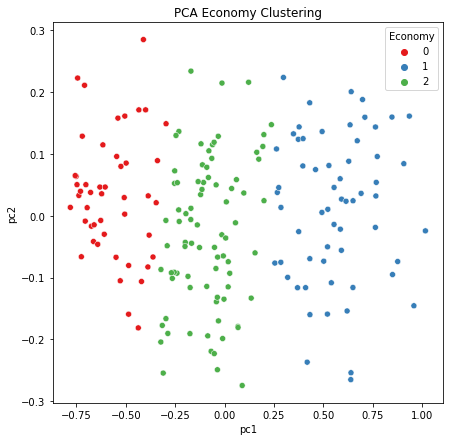

In [7]:
#### PCA for Economy Clustering ###

pca = PCA(n_components = 2)
data_reduced_economy = df_economy.drop(['Economy'],axis=1)
data_reduced_economy = pca.fit_transform(data_reduced_economy)
pca.explained_variance_ratio_

data_reduced_df_economy = pd.DataFrame(data_reduced_economy)
data_reduced_df_economy.columns = ['pc1','pc2']
pca_clustering_economy = pd.concat([data_reduced_df_economy,df_economy['Economy']],axis=1)

### Ploting the PCA for Economy ###

plt.figure(figsize=(7,7))
sns.scatterplot(x='pc1', y='pc2', hue= 'Economy', data=pca_clustering_economy,palette='Set1').set_title('PCA Economy Clustering')
plt.show()

In [8]:
##################
### Inequality ###
##################
df_inequality = df[['IHDI','ILE','IE','II','VE','RPAE','SLF']]

### Fiting the model ###
kmeanModel = KMeans(n_clusters=3, random_state = 42)
kmeanModel.fit(df_inequality)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

#print(centroids)
#print(labels)

df_inequality['Inequality'] = pd.DataFrame(labels)

In [9]:
####### Creating Data Frame with the Brazil cluster #######

df_inequality_hdi = pd.concat([df_country,df_inequality], axis=1)
df_inequality_hdi = df_inequality_hdi[df_inequality_hdi['Inequality']==2]

pd.DataFrame(df_inequality_hdi).to_csv("df_inequality_hdi.csv", index=False)

#df_inequality_hdi.head()

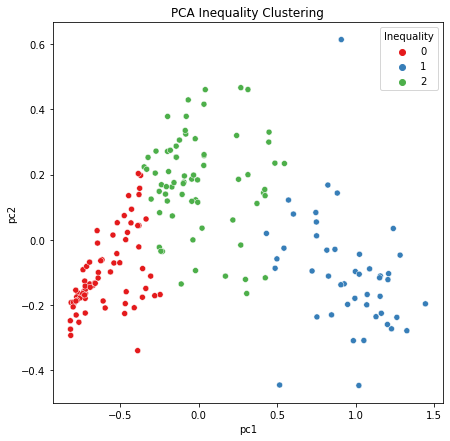

In [10]:
#### PCA for Inequality Clustering ###

pca = PCA(n_components = 2)
data_reduced_inequality = df_inequality.drop(['Inequality'],axis=1)
data_reduced_inequality = pca.fit_transform(data_reduced_inequality)
pca.explained_variance_ratio_

data_reduced_df_inequality = pd.DataFrame(data_reduced_inequality)
data_reduced_df_inequality.columns = ['pc1','pc2']
pca_clustering_inequality = pd.concat([data_reduced_df_inequality,df_inequality['Inequality']],axis=1)

### Ploting the PCA for inequality ###

plt.figure(figsize=(7,7))
sns.scatterplot(x='pc1', y='pc2', hue= 'Inequality', data=pca_clustering_inequality,palette='Set1').set_title('PCA Inequality Clustering')
plt.show()

In [11]:
##############
### Gender ###
##############
df_gender = df[['GDIV', 'GIIV','SSP', 'WAFI']]

### Fiting the model ###
kmeanModel = KMeans(n_clusters=4, random_state = 42)
kmeanModel.fit(df_gender)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

#print(centroids)
#print(labels)

df_gender['Gender'] = pd.DataFrame(labels)

In [12]:
####### Creating Data Frame with the Brazil cluster #######

df_gender_hdi = pd.concat([df_country,df_gender], axis=1)
df_gender_hdi = df_gender_hdi[df_gender_hdi['Gender']==0]

pd.DataFrame(df_gender_hdi).to_csv("df_gender_hdi.csv", index=False)

#df_gender_hdi.head()

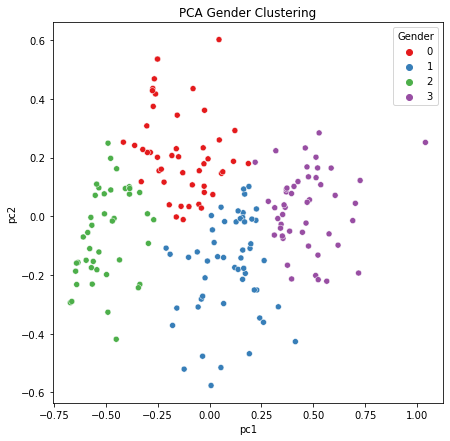

In [13]:
#### PCA for Gender Clustering ###

pca = PCA(n_components = 2)
data_reduced_gender = df_gender.drop(['Gender'],axis=1)
data_reduced_gender = pca.fit_transform(data_reduced_gender)
pca.explained_variance_ratio_

data_reduced_df_gender = pd.DataFrame(data_reduced_gender)
data_reduced_df_gender.columns = ['pc1','pc2']
pca_clustering_gender = pd.concat([data_reduced_df_gender,df_gender['Gender']],axis=1)

### Ploting the PCA for gender ###

plt.figure(figsize=(7,7))
sns.scatterplot(x='pc1', y='pc2', hue= 'Gender', data=pca_clustering_gender,palette='Set1').set_title('PCA Gender Clustering')
plt.show()

In [14]:
######################
### Population/Age ###
######################
df_population = df[['TP', 'TUP', 'MA']]

### Fiting the model ###
kmeanModel = KMeans(n_clusters=4, random_state = 42)
kmeanModel.fit(df_population)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

#print(centroids)
#print(labels)

df_population['Population'] = pd.DataFrame(labels)

In [15]:
####### Creating Data Frame with the Brazil cluster #######

df_population_hdi = pd.concat([df_country,df_population], axis=1)
df_population_hdi = df_population_hdi[df_population_hdi['Population']==1]

pd.DataFrame(df_population_hdi).to_csv("df_population_hdi.csv", index=False)

#df_population_hdi.head()

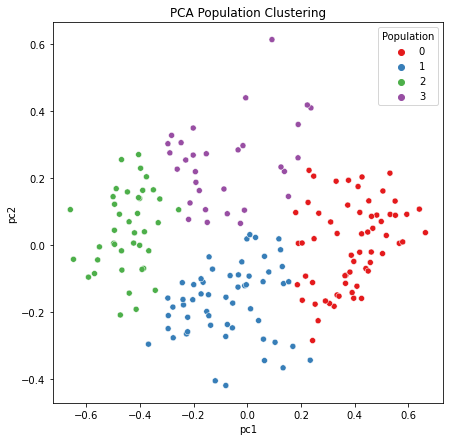

In [16]:
#### PCA for population Clustering ###

pca = PCA(n_components = 2)
data_reduced_population = df_population.drop(['Population'],axis=1)
data_reduced_population = pca.fit_transform(data_reduced_population)
pca.explained_variance_ratio_

data_reduced_df_population = pd.DataFrame(data_reduced_population)
data_reduced_df_population.columns = ['pc1','pc2']
pca_clustering_population = pd.concat([data_reduced_df_population,df_population['Population']],axis=1)

### Ploting the PCA for population ###

plt.figure(figsize=(7,7))
sns.scatterplot(x='pc1', y='pc2', hue= 'Population', data=pca_clustering_population,palette='Set1').set_title('PCA Population Clustering')
plt.show()

In [17]:
#############################################
### Health/Education/Research Expenditure ###
#############################################
df_expenditure = df[['CHE','GEE','RDE']]

### Fiting the model ###
kmeanModel = KMeans(n_clusters=4, random_state = 42)
kmeanModel.fit(df_expenditure)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

#print(centroids)
#print(labels)

df_expenditure['Expenditure'] = pd.DataFrame(labels)

In [18]:
####### Creating Data Frame with the Brazil cluster #######

df_expenditure_hdi = pd.concat([df_country,df_expenditure], axis=1)
df_expenditure_hdi = df_expenditure_hdi[df_expenditure_hdi['Expenditure']==2]

pd.DataFrame(df_expenditure_hdi).to_csv("df_expenditure_hdi.csv", index=False)

#df_expenditure_hdi.head()

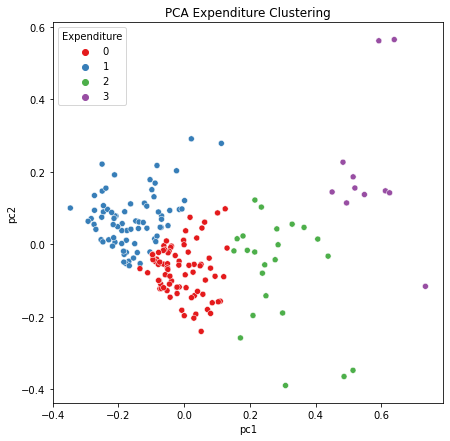

In [19]:
#### PCA for expenditure Clustering ###

pca = PCA(n_components = 2)
data_reduced_expenditure = df_expenditure.drop(['Expenditure'],axis=1)
data_reduced_expenditure = pca.fit_transform(data_reduced_expenditure)
pca.explained_variance_ratio_

data_reduced_df_expenditure = pd.DataFrame(data_reduced_expenditure)
data_reduced_df_expenditure.columns = ['pc1','pc2']
pca_clustering_expenditure = pd.concat([data_reduced_df_expenditure,df_expenditure['Expenditure']],axis=1)

### Ploting the PCA for expenditure ###

plt.figure(figsize=(7,7))
sns.scatterplot(x='pc1', y='pc2', hue= 'Expenditure', data=pca_clustering_expenditure,palette='Set1').set_title('PCA Expenditure Clustering')
plt.show()

In [20]:
####################
### Health Acess ###
####################
df_health = df[['PPP','HB']]

### Fiting the model ###
kmeanModel = KMeans(n_clusters=4, random_state = 42)
kmeanModel.fit(df_health)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

#print(centroids)
#print(labels)

df_health['Health'] = pd.DataFrame(labels)

In [21]:
####### Creating Data Frame with the Brazil cluster #######

df_health_hdi = pd.concat([df_country,df_health], axis=1)
df_health_hdi = df_health_hdi[df_health_hdi['Health']==0]

pd.DataFrame(df_health_hdi).to_csv("df_health_hdi.csv", index=False)

#df_health_hdi.head()

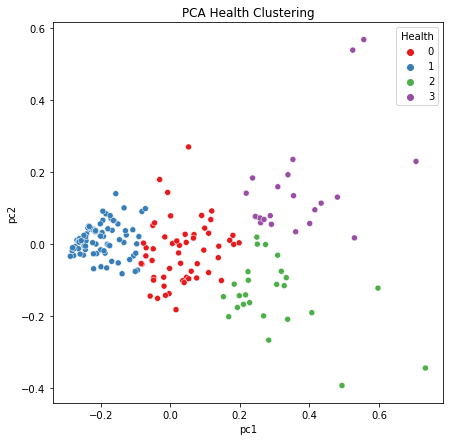

In [22]:
#### PCA for health Clustering ###

pca = PCA(n_components = 2)
data_reduced_health = df_health.drop(['Health'],axis=1)
data_reduced_health = pca.fit_transform(data_reduced_health)
pca.explained_variance_ratio_

data_reduced_df_health = pd.DataFrame(data_reduced_health)
data_reduced_df_health.columns = ['pc1','pc2']
pca_clustering_health = pd.concat([data_reduced_df_health,df_health['Health']],axis=1)

### Ploting the PCA for health ###

plt.figure(figsize=(7,7))
sns.scatterplot(x='pc1', y='pc2', hue= 'Health', data=pca_clustering_health,palette='Set1').set_title('PCA Health Clustering')
plt.show()

In [23]:
####################
### Environment ###
###################
df_environment = df[['CDEP', 'CDE', 'FA', 'FAC', 'DMC', 'RLI']]

### Fiting the model and ploting an example ###
kmeanModel = KMeans(n_clusters=4, random_state = 42)
kmeanModel.fit(df_environment)

centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

#print(centroids)
#print(labels)

df_environment['Environment'] = pd.DataFrame(labels)

In [24]:
####### Creating Data Frame with the Brazil cluster #######

df_environment_hdi = pd.concat([df_country,df_environment], axis=1)
df_environment_hdi = df_environment_hdi[df_environment_hdi['Environment']==0]

pd.DataFrame(df_environment_hdi).to_csv("df_environment_hdi.csv", index=False)

#df_environment_hdi.head()

In [25]:
#### PCA for Environment Clustering ###

pca = PCA(n_components = 2)
data_reduced_environment = df_environment.drop(['Environment'],axis=1)
data_reduced_environment = pca.fit_transform(data_reduced_environment)
pca.explained_variance_ratio_

data_reduced_df_environment = pd.DataFrame(data_reduced_environment)
data_reduced_df_environment.columns = ['pc1','pc2']
pca_clustering_environment = pd.concat([data_reduced_df_environment,df_environment['Environment']],axis=1)

### Ploting the PCA for Environment ###

plt.figure(figsize=(7,7))
sns.scatterplot(x='pc1', y='pc2', hue= 'Environment', data=pca_clustering_environment,palette='Set1').set_title('PCA Environment Clustering')
plt.show()

In [26]:
############################
### Final Results so far ###
############################
df_full_hdi = pd.concat([df_country,df_economy['Economy'],df_inequality['Inequality'],df_gender['Gender'],df_population['Population'],df_expenditure['Expenditure'],df_health['Health'],df_environment['Environment']], axis=1)

df_full_hdi.set_index('Country',inplace=True)

#df_full_hdi.head()

pd.DataFrame(df_full_hdi).to_csv("df_full_hdi.csv", index=False)

In [27]:
df_full_hdi.loc['Brazil'][:]

Economy        2
Inequality     2
Gender         0
Population     1
Expenditure    2
Health         0
Environment    0
Name: Brazil, dtype: int32

In [28]:
###################################
##### All data with clustering ####
###################################
df_all_data_hdi = pd.concat([df_country,df_economy,df_inequality,df_gender,df_population,df_expenditure,df_health,df_environment], axis=1)

df_all_data_hdi.set_index('Country',inplace=True)

pd.DataFrame(df_all_data_hdi).to_csv("df_all_data_hdi.csv", index=False)

df_all_data_hdi.head()

HDI        LE       EYS       MYS       GNI  \
Country                                                                    
Norway                  1.000000  0.922103  0.770596  0.899745  0.504617   
Ireland                 0.996448  0.919253  0.808305  0.881242  0.519020   
Switzerland             0.996448  0.965801  0.668070  0.938367  0.526872   
Hong Kong, China (SAR)  0.985790  1.000000  0.703531  0.850351  0.477679   
Iceland                 0.985790  0.940785  0.830596  0.889754  0.413950   

                        Economy      IHDI       ILE        IE        II  ...  \
Country                                                                  ...   
Norway                        0  1.000000  0.015584  0.033028  0.083754  ...   
Ireland                       0  0.979010  0.025974  0.052323  0.133583  ...   
Switzerland                   0  0.985007  0.028571  0.022839  0.132666  ...   
Hong Kong, China (SAR)        0  0.887556  0.002597  0.184121  0.352606  ...   
Iceland                       0  0.992504  0.000000  0.042383  0.066738  ...   

                             PPP        HB  Health      CDEP       CDE  \
Country                                                                  
Norway                  0.345203  0.266304       0  0.218194  0.099192   
Ireland                 0.392314  0.222826       0  0.212271  0.103245   
Switzerland             0.509253  0.351708       2  0.113338  0.060352   
Hong Kong, China (SAR)  0.223619  0.226674       0  0.153596  0.098397   
Iceland                 0.483337  0.211957       2  0.283510  0.133157   

                              FA       FAC       DMC       RLI  Environment  
Country                                                                      
Norway                  0.337662  0.260558  0.405311  0.907773            1  
Ireland                 0.112233  0.480169  0.243603  0.866375            1  
Switzerland             0.323946  0.293176  0.248319  0.968740            1  
Hong Kong, China (SAR)  0.226478  0.288939  0.258017  0.720473            1  
Iceland                 0.005127  1.000000  0.270841  0.776510            1  

[5 rows x 37 columns]

In [29]:
#list(df_full_hdi[df_full_hdi['Inequality']==2].index.values)

In [30]:
#list(df_full_hdi[df_full_hdi['Gender']==0].index.values)

In [31]:
#list(df_full_hdi[df_full_hdi['Population']==1].index.values)

In [32]:
#list(df_full_hdi[df_full_hdi['Expenditure']==2].index.values)

In [33]:
#list(df_full_hdi[df_full_hdi['Health']==0].index.values)

In [34]:
#list(df_full_hdi[df_full_hdi['Environment']==0].index.values)